# Titanic Disaster Analysis #

I investigate the Titanic data to find the factors that make people more likely to survive. This is for Investigate a Dataset project. The data is taken from titanic_data.csv. My questions are:
- Is there any correlation between age and gender with the survival?
- Is there any correlation between the cabin class and the survival?
- Are those who travel together with their siblings or family are more likely to survive?
- Is there any correlation between Cabin number and the survivability?

Below is the outline of this notebook:
1. Loading the data
2. Filling out the missing values
3. Exploration
4. Conclusion

## Loading the data ##
I will load the data into Panda DataFrame. It is called titanic_df. I will show the first 5 rows of the data.

In [2]:
import pandas as pd
import numpy as np
from pylab import *

titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Filling Out The Missing Values ###
I will check whether there is missing value in the data and find where it is located.

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are missing values in 'Age', 'Cabin', and 'Embarked' column. Their total number is less than the other column. I will fill in the blank for the 'age' column. 

There was a "Women and children first" policy for filling up the lifeboats. I put female and child in one group as'female/child', and adult male as 'male'. I consider 'child' if their age below 12 years old. I calculate their median age and use it to fill the missing age values.

In [3]:
def Grouping(b):
    if b['Age'] < 12:
        return 'female/child'
    elif b['Sex'] == 'female' and b['Age'] >= 12:
        return 'female/child'
    elif b['Sex'] == 'male' and b['Age'] >= 12:
        return 'male'

In [4]:
titanic_df['Grouping'] = titanic_df.apply(Grouping, axis=1)
titanic_df.groupby('Grouping')['Age'].median()

Grouping
female/child    24.0
male            30.0
Name: Age, dtype: float64

In [5]:
FemaleMed = 24
MaleMed = 30

I am creating the box plot of the 'Grouping', 'Age', and Survivability. Before that I am going to make a new column stated that '1' is 'survived', whereas '0' is 'perished'.

In [6]:
def fate(a):
    if a == 1:
        return 'survived'
    else:
        return 'perished'

titanic_df['Fate'] = titanic_df['Survived'].apply(fate)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

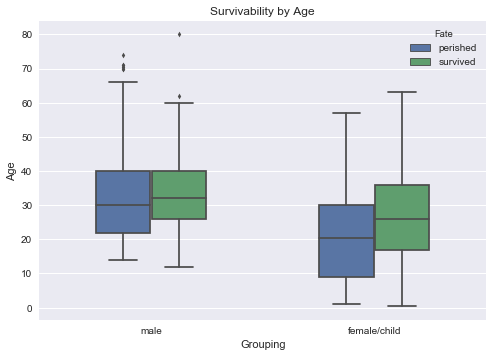

In [8]:
sns.boxplot(x="Grouping", y="Age",hue="Fate", fliersize=4, width=0.5, 
            data=titanic_df).set_title("Survivability by Age")
plt.show()

I find that there are a few types of name's title whose age is missing:
- Mr., which I classify as adult male, therefore in male group.
- Mrs., which I classify as adult female, therefore in female/child group.
- Miss., which I classify in female/child group.
- Master., which used to be the title for the boy, I classify it as female/child group.
- Dr., which can be male/female. I try to find among the missing value in Age column, there is only one 'Dr.' which has Passenger ID 767. The classification is based on the 'Sex'. If male, then in male group. If female, then in female/child group.

I am going to fill the children missing age as 6 years old. The missing female age is filled with the median of known female and child age. All missing adult male age is the median adult male age.

In [9]:
for i in range (len (titanic_df.Name)):
    if 'Mrs.' or 'Miss.' in titanic_df.Name[i]:
        titanic_df.Age.fillna(value=FemaleMed, inplace=True)
    if 'Master.' in titanic_df.Name[i]:
        titanic_df.Age.fillna(value=6, inplace=True)
    if 'Mr.' in titanic_df.Name[i]:
        titanic_df.Age.fillna(value=MaleMed, inplace=True)

In [10]:
titanic_df['Age'] = (np.where(titanic_df['PassengerId'] == 767, 
                    np.where(titanic_df['Sex'] == 'male', MaleMed, FemaleMed), titanic_df['Age']))

Because of missing age, some values in 'Grouping' column is still missing. Since I have filled all the age, I will fill in the missing value in 'Grouping' column.

In [11]:
titanic_df['Grouping'] = titanic_df.apply(Grouping, axis=1)

In [12]:
titanic_df.groupby(['Embarked','Sex'])['Embarked'].count().unstack('Embarked')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


There are 2 missing values in 'Embark' column. Most of the passenger embarked from 'S' which is Southampton. I will just fill the missing value in 'Embarked' with 'S', similar with the majority of the passenger. It would not much affect the total Embarked percentage.

In [13]:
titanic_df.Embarked.fillna(value='S', inplace=True)

There is quite a lot of missing value in Cabin column. I wonder whether it has relation with the survivability. I get to know from google that the Odd number cabin is on the *Starboard*, whereas Even number cabin is on the *Port* side of the ship. *Starboard* means the side of a ship that is on the right when one is facing forward, whereas *port* is the side of a ship that is on the left when one is facing forward.

I will create a new column called 'CabinSide' to show whether the passenger stay in Starboard or Port side of the ship. Those who don't have the cabin number is filled with 'Unknown'. Their missing values in Cabin column are filled with 'NaN'.

In [14]:
titanic_df['CabinSide'] = 'Unknown'
titanic_df['Cabin'].fillna('NaN', inplace=True)

In [15]:
titanic_df['CabinSide'] = (np.where(titanic_df["Cabin"].str[-1].isin(["1", "3", "5", "7", "9"]), "Starboard",
        np.where(titanic_df["Cabin"].str[-1].isin(["0", "2", "4", "6", "8"]), "Port", titanic_df["CabinSide"])))

I find that there is people who have more than 1 cabin. One particular concern is The Ryerson whose cabin number is B57 B59 B63 B66, containing both even and odd number. I just assume that they are all gathered on Starboard (odd-number cabin). Their ticket is <b>PC 17608</b>, so I use it to index the row of the Ryerson. 

In [16]:
titanic_df.loc[titanic_df["Ticket"]=="PC 17608", "CabinSide"] = "Starboard"

In [17]:
np.where(pd.isnull(titanic_df))

(array([], dtype=int64), array([], dtype=int64))

I find that there is no more missing values.

## Exploration Phase ##
I will check which group has the highest casualties. I start first with the gender, after that the cabin class.

### Male Survivability ### 
I will analyze whether gender will affect the survivability. After that create a stacked bar chart from that data.

In [18]:
titanic_df.groupby(['Fate','Sex'])['Sex'].count().unstack('Sex')

Sex,female,male
Fate,,
perished,81,468
survived,233,109


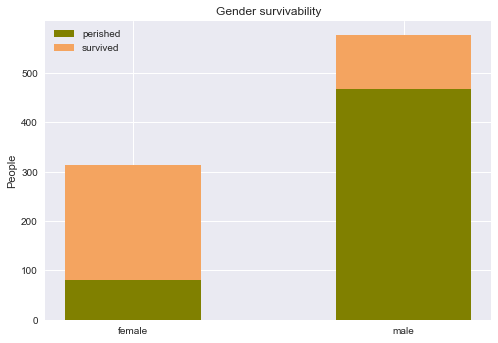

In [19]:
sur = titanic_df.groupby(['Survived','Sex'])['Sex'].count().unstack('Sex').loc[1, :]
per = titanic_df.groupby(['Survived','Sex'])['Sex'].count().unstack('Sex').loc[0, :]

ind = np.arange(2)
p1 = plt.bar(ind, per, 0.5, color='olive')
p2 = plt.bar(ind, sur, 0.5, color='sandybrown', bottom=per)

plt.xlabel('Gender')
plt.ylabel('People')
plt.title('Gender survivability')
plt.xticks(ind, ('female', 'male'))
plt.yticks(np.arange(0, 600, 100))
plt.legend((p1[0], p2[0]), ('perished', 'survived'))

plt.show()

I find that the male have much more casualties than female in term of percentage and number.

### Does the first class survive better? ###
I am going to compare between 3 cabin class and the survivability. Afterward, I am going to create the countplot from that data.

In [20]:
titanic_df.groupby(['Fate','Pclass'])['Pclass'].count().unstack('Pclass')

Pclass,1,2,3
Fate,,,
perished,80,97,372
survived,136,87,119


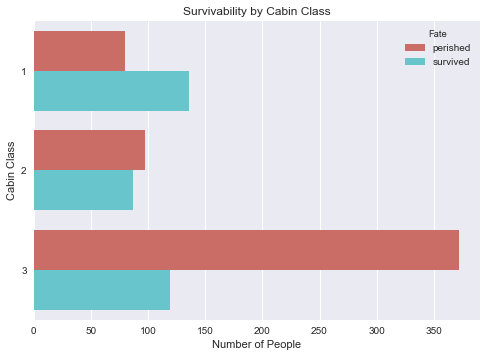

In [21]:
j = sns.countplot(y="Pclass", hue="Fate", data=titanic_df, palette="hls")
j.set(xlabel='Number of People', ylabel='Cabin Class', title="Survivability by Cabin Class")
plt.show()

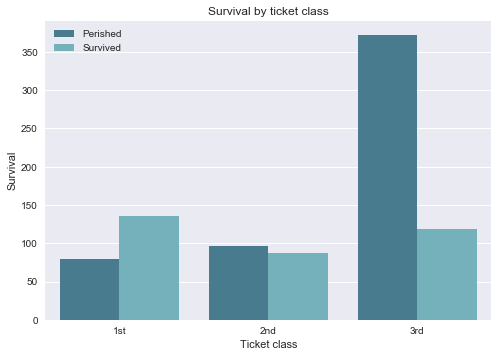

In [11]:
plot = sns.countplot(x="Pclass", hue="Survived", data=titanic_df, palette="GnBu_d")
plot.set(xlabel='Ticket class', ylabel='Survival')
sns.plt.title("Survival by ticket class")
labels_x = ["1st", "2nd", "3rd"]
plot.set_xticklabels(labels_x)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Perished','Survived'])
plt.show()

The survivability rate is the highest among the first class. The third class survivability is the lowest, their quantity is also the greatest.

### Does travelling alone affect the survivability? ###

I am going to analyze from <b>SibSp</b>. It shows how many sibling and spouse that the passenger has on board. Below is the definition:<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés are not included)

I am also going to analyze from <b>Parch</b>. It shows how many parent and child that the passenger has on board. Even though some children might travelled only with a nanny, but nanny is not included.<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson

I will combine the <b>SibSp</b> and <b>Parch</b> to be one column called RelativeSize, and then compare the survivability between those who have family on board and those who do not. After that, I create a chart from that data.

In [5]:
titanic_df['RelativeSize'] = titanic_df['SibSp'] + titanic_df['Parch']

In [23]:
titanic_df.groupby(['Fate','RelativeSize'])['RelativeSize'].count().unstack('RelativeSize')

RelativeSize,0,1,2,3,4,5,6,7,10
Fate,,,,,,,,,
perished,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0
survived,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN


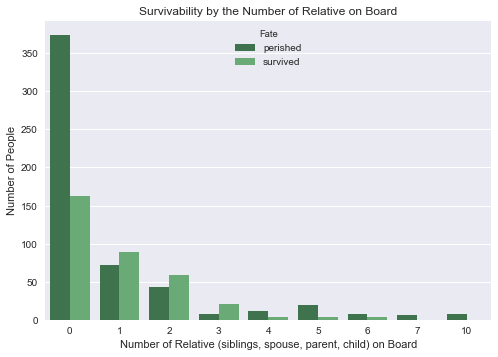

In [24]:
k = sns.countplot(x="RelativeSize", hue="Fate", data=titanic_df, palette="Greens_d")
k.set(xlabel='Number of Relative (siblings, spouse, parent, child) on Board', ylabel='Number of People', 
      title="Survivability by the Number of Relative on Board")
plt.show()

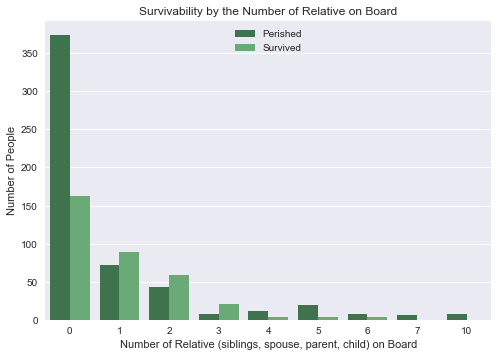

In [14]:
sns.countplot(x="RelativeSize", hue="Survived", data=titanic_df, palette="Greens_d").set(xlabel=
                'Number of Relative (siblings, spouse, parent, child) on Board', ylabel='Number of People',
                title="Survivability by the Number of Relative on Board")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Perished','Survived'])
plt.show()          

The number of relatives that people have in Titanic is up to 10 people. I find that no one that has more than 6 relatives on board survive. Those who have no relative has quite low survivability.

I will group the one that have relative on board into one group. I am creating a new column called 'Relative'. Those who have relative on board is assigned number 1, those who don't have is assigned number 0.

In [6]:
titanic_df['Relative'] = np.where(titanic_df['RelativeSize'] != 0, 'have relative', 'alone')

In [26]:
titanic_df.groupby(['Fate','Relative'])['Relative'].count().unstack('Relative')

Relative,alone,have relative
Fate,,
perished,374,175
survived,163,179


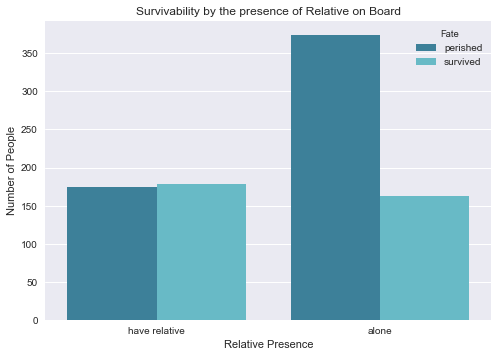

In [27]:
h = sns.countplot(x="Relative", hue="Fate", data=titanic_df, saturation=1, palette="GnBu_d")
h.set(ylabel='Number of People', xlabel='Relative Presence', 
      title="Survivability by the presence of Relative on Board")
plt.show()

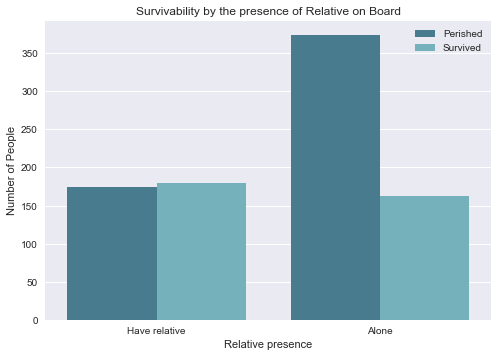

In [8]:
plot = sns.countplot(x="Relative", hue="Survived", data=titanic_df, palette="GnBu_d")
plot.set(xlabel='Relative presence', ylabel='Number of People')
sns.plt.title("Survivability by the presence of Relative on Board")
labels_x = ["Have relative","Alone"]
plot.set_xticklabels(labels_x)

# access current labels:
handles, labels = plt.gca().get_legend_handles_labels()
# create new labels
plt.legend(handles, ['Perished','Survived'])
plt.show()

The survivability difference between those who have relatives onboard and those who don't have seems to be obvious. But I am going to have Chi Square test of independence for these data to make sure whether it has dependence. 

In [28]:
import scipy.stats as stats
from scipy.stats import mode

In [29]:
Relative = titanic_df.groupby(['Fate','Relative'])['Relative'].count().unstack('Relative')

In [30]:
family = Relative.copy()
family["RowTotal"] = family.sum(axis=1)
family.loc["ColTotal"] = family.sum(axis=0)
family

Relative,alone,have relative,RowTotal
Fate,,,
perished,374,175,549
survived,163,179,342
ColTotal,537,354,891


In [31]:
stats.chi2_contingency(observed= Relative)

(36.00051446773864,
 1.9726543846517183e-09,
 1,
 array([[ 330.87878788,  218.12121212],
        [ 206.12121212,  135.87878788]]))

Chi Sq = 36 <br>
P Value = 1.97 <br>
df = 1

The P value is far greater that the alpha 0.05. It is clearly shown that having relative on board affected the survivability.

### Does the cabin side affect the survivability? ###

I am going to check whether there is correlation between those who stay in Starboard and those who stay in Port side of the ship. Those who stay in Starboard side stay in odd-number cabin. Those who stay in Port side stay in even-number cabin.

In [32]:
titanic_df.groupby(['CabinSide','Fate'])['CabinSide'].count().unstack('CabinSide')

CabinSide,Port,Starboard,Unknown
Fate,,,
perished,42,24,483
survived,66,68,208


It seems that we don't know most of the passenger cabin side. I only get about 100 people stay in each side of the Ship. Another ~700 people is unknown. <br>
I am going to have Chi-Squared Test of Independence to know whether the two variables (Cabin side and Survivability) are independent. I will get rid of the people in the Unknown side.

In [33]:
data = titanic_df.groupby(['CabinSide','Fate'])['CabinSide'].count().unstack('CabinSide').iloc[:,0:2]
observed = data.copy()  # get the table without total

In [34]:
data["RowTotal"] = data.sum(axis=1)
data.loc["ColTotal"] = data.sum(axis=0)
data

CabinSide,Port,Starboard,RowTotal
Fate,,,
perished,42,24,66
survived,66,68,134
ColTotal,108,92,200


In [35]:
stats.chi2_contingency(observed= observed)

(3.1262586205264111, 0.077040358396788494, 1, array([[ 35.64,  30.36],
        [ 72.36,  61.64]]))

Chi Sq = 3.126 <br>
P Value = 0.077 <br>
df = 1

The P Value is more than 0.05 but less than 0.1. It is not significant if the alpha is 0.05, but significant if alpha is 0.10.

There are quite a lot of people that we don't have the cabin number data. If we can get more data, perhaps we can get different result. I am curious to find out the survivability among those whose cabin is unknown.

In [36]:
titanic_df.groupby(['CabinSide','Fate'])['Fate'].count().unstack('Fate')

Fate,perished,survived
CabinSide,,
Port,42,66
Starboard,24,68
Unknown,483,208


In [37]:
titanic_df['Survive'] = titanic_df.groupby(['CabinSide'])['Survived'].transform('sum')
titanic_df['Total'] = titanic_df.groupby(['CabinSide'])['Survived'].transform('count')
titanic_df['SurvivalRate'] = titanic_df['Survive']*100 / titanic_df['Total']
titanic_df.groupby(['CabinSide', 'Survive','Total'])["SurvivalRate"].value_counts()

CabinSide  Survive  Total  SurvivalRate
Port       66       108    61.111111       108
Starboard  68       92     73.913043        92
Unknown    208      691    30.101302       691
Name: SurvivalRate, dtype: int64

The survivability on the Port side is 61.1%, whereas in Starboard side is 73.9%. The survivability among the unknown cabin is quite low, only 30.1%, much lower than the survivability among those that we know the cabin number.

I want to know the distribution of those who don't have the cabin number vs the ticket class. I am going to create a bar chart from that data.

In [38]:
titanic_df.groupby(['Pclass','Fate','CabinSide'])['CabinSide'].count().unstack('CabinSide')

CabinSide        Port  Starboard  Unknown
Pclass Fate                              
1      perished    38         20       22
       survived    58         59       19
2      perished     1          1       95
       survived     5          6       76
3      perished     3          3      366
       survived     3          3      113

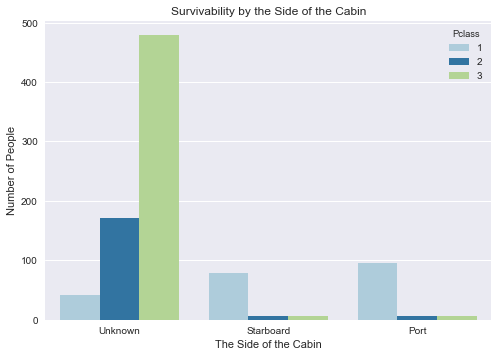

In [39]:
g = sns.countplot(x="CabinSide", hue="Pclass", data=titanic_df, palette="Paired")
g.set(xlabel='The Side of the Cabin', ylabel='Number of People', title= "Survivability by the Side of the Cabin")
plt.show()

I find that those who are in the second and third class are more likely not to be known their cabin number than those in the first class. There are only less than 15 people of those who stay in second/third class that we can know their cabin number. It means that the port and starboard comparison is skewed towards those who stay in the first class cabin.

### Conclusion ###

I find that the male passenger have much lower survivability than the female and children passenger. It is noted that the lifeboat capacity is less the passenger on board, therefore ‘women and child first’ policy affecting the survivability. I find from the search engine that the water temperature surrounding Titanic at the time of the disaster is about 28 F or -2 C. Those who were not in the lifeboat cannot bear quite long time in such a cold temperature.

The other finding is the first class passenger have much higher survivability than the second and the third class. The third class is the worst. It might be because of their cabin distance with the lifeboat of due to they have more power in getting into lifeboat than the other passenger.

The passenger who travel alone have much lower survivability than those who travel together with siblings, parents, child, or spouse, as what is proved from the Chi square test. Perhaps they can work together to get into the lifeboat.

The passenger who stay in starboard side have slightly higher survivability than those who stay in port side (73.9% against 61.1%). The correlation is not that convincing if the alpha value is 0.05. The probability is 0.077. Most of the passenger cabin number is unknown. If I can get more data about cabin number, I might get a different conclusion.

The passengers that we don’t know their cabin number have much lower survivability. After further investigation, I find that most of them stay in the third class cabin. In fact most of those that we know the cabin number stay in the first class. Therefore the port/starboard side data biased toward those who stay in the first class cabin. I am not sure whether the cabin number data is getting through sample or that's the only actual data that we can get. If it is sample, we do not know how the sample was chosen from the actual population of people. There might be an intentional/unintentional bias in how the sample was selected.

I conclude that to have a higher survivability in Titanic disaster, one should be: 
- female/child
- stay in the first class cabin 
- travel together with family member

I understand that there are more possibilities in survivability. This analysis have limitation in that it does not have the full data for every passenger and where they are located when the collision happened. The availability of that data will help to find out the reason why certain group of people can survive better than the others. Thank you.